# MUSHROOMS

## Binary Classification

### Imports

In [1]:
import os
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt

### Load Data

In [2]:
DATA_PATH = '../DATA/'
FILE_NAME = 'mushrooms.csv'
def load_data(data_path=DATA_PATH, file_name=FILE_NAME):
    csv_path = os.path.join(data_path, file_name)
    return pd.read_csv(csv_path)

dataset = load_data()

### View Data and Informations

In [3]:
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
edible, poisonous = dataset['class'].value_counts()

print("Edible:\t  ", edible,"\nPoisonous:", poisonous)

Edible:	   4208 
Poisonous: 3916


In [6]:
# Categorical to numerical
labels = {'e': 0, 'p': 1}
dataset['class'].replace(labels, inplace=True)

edible, poisonous = dataset['class'].value_counts()
print("0 - Edible:   ", edible,"\n1 - Poisonous:", poisonous)

0 - Edible:    4208 
1 - Poisonous: 3916


# NN1 Stalk Root - Rooted (r)

### Split Dataset

#### Get the Labels

In [7]:
X, y =  dataset.drop('class', axis=1), dataset['class'].copy()

print("X:",X.shape,"\ny:",y.shape)

X: (8124, 22) 
y: (8124,)


#### Train Set and Test Set

In [8]:
from sklearn.model_selection import train_test_split
X_white = pd.DataFrame()
X_not_white = pd.DataFrame()
y_white = pd.Series(dtype='float64')
y_not_white = pd.Series(dtype='float64')
for i in range(0,len(X)):
    if X.loc[i,"stalk-root"] == "r":
        X_white = X_white.append(X.iloc[i,:])
        y_white = y_white.append(pd.Series(y.iloc[i]))
    else:
        X_not_white = X_not_white.append(X.iloc[i,:])
        y_not_white = y_not_white.append(pd.Series(y.iloc[i]))

In [9]:
X_train_not_white, X_test_not_white, y_train_not_white, y_test_not_white = train_test_split(X_not_white, y_not_white, test_size=1-(6905/(8124-len(X_white))), random_state=87)

# print(X_test_white)
X_train_white = (X_train_not_white)
# X_test_white = X_white.append(X_test_not_white)
y_train_white = (y_train_not_white)
# y_test_white = y_white.append(y_test_not_white)

In [10]:
from sklearn.utils import shuffle
X_train_full1 = shuffle(X_train_white, random_state=87)
X_test = shuffle(X, random_state=87).iloc[2000:4000]
y_train_full1 = shuffle(y_train_white, random_state=87)
y_test = shuffle(y, random_state=87).iloc[2000:4000]

In [11]:
# print(X_test[:5])
# print(y_test.loc[:,"0"])
# from sklearn.model_selection import train_test_split

# X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.15, random_state=87)

# print("85% - X_train size:", X_train_full.shape[0], " y_train size:", y_train_full.shape[0])
# print("15% - X_test size: ", X_test.shape[0], " y_test size: ", y_test.shape[0])

#### Validation Set

In [12]:
X_valid1, X_train1 = X_train_full1[:500], X_train_full1[500:]
y_valid1, y_train1 = y_train_full1[:500], y_train_full1[500:]

print("X_train:", X_train1.shape[0], "y_train", y_train1.shape[0])
print("X_valid: ", X_valid1.shape[0], "y_valid ", y_valid1.shape[0])
print("X_test: ", X_test.shape[0], "y_test ", X_test.shape[0])


X_train: 6404 y_train 6404
X_valid:  500 y_valid  500
X_test:  2000 y_test  2000


### Prepare the Data

#### Data Transformation

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

cat_attr_pipeline = Pipeline([
                        ('encoder', OrdinalEncoder())
                    ])

cols = list(X)
pipeline = ColumnTransformer([
                ('cat_attr_pipeline', cat_attr_pipeline, cols)
            ])


X_train1 = pipeline.fit_transform(X_train1)
X_valid1 = pipeline.fit_transform(X_valid1)
X_test1  = pipeline.fit_transform(X_test)

### Neural Network

#### Model

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense

In [15]:
# tf.random.set_random_seed(87)
tf.random.set_seed(87)

In [16]:
model1 = Sequential([
    InputLayer(input_shape=(22,)),    # input  layer
    Dense(45, activation='relu'),     # hidden layer
    Dense(1,   activation='sigmoid')  # output layer
])

In [17]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 45)                1035      
                                                                 
 dense_1 (Dense)             (None, 1)                 46        
                                                                 
Total params: 1,081
Trainable params: 1,081
Non-trainable params: 0
_________________________________________________________________


#### Compile the Model

In [18]:
model1.compile(loss='binary_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

#### Prepare Callbacks

In [19]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint_cb = ModelCheckpoint('../SavedModels/best_model.h5',
                                save_best_only=True)

early_stopping_cb = EarlyStopping(patience=3,
                                  restore_best_weights=True)

### Training

In [20]:
train_model1 = model1.fit(X_train1, y_train1,
                        epochs=100,
                        validation_data=(X_valid1, y_valid1),
                        callbacks=[checkpoint_cb, early_stopping_cb])
                        


Epoch 1/100
201/201 [==============================] - 1s 2ms/step - loss: 0.4446 - accuracy: 0.8300 - val_loss: 0.3598 - val_accuracy: 0.8760
Epoch 2/100
201/201 [==============================] - 0s 938us/step - loss: 0.3055 - accuracy: 0.8933 - val_loss: 0.2637 - val_accuracy: 0.9200
Epoch 3/100
201/201 [==============================] - 0s 873us/step - loss: 0.2596 - accuracy: 0.9087 - val_loss: 0.2456 - val_accuracy: 0.9220
Epoch 4/100
201/201 [==============================] - 0s 855us/step - loss: 0.2307 - accuracy: 0.9179 - val_loss: 0.1913 - val_accuracy: 0.9440
Epoch 5/100
201/201 [==============================] - 0s 842us/step - loss: 0.2083 - accuracy: 0.9222 - val_loss: 0.1997 - val_accuracy: 0.9320
Epoch 6/100
201/201 [==============================] - 0s 869us/step - loss: 0.1926 - accuracy: 0.9283 - val_loss: 0.1614 - val_accuracy: 0.9500
Epoch 7/100
201/201 [==============================] - 0s 908us/step - loss: 0.1757 - accuracy: 0.9364 - val_loss: 0.1457 - val_accu

### Evaluate the Best Model on Test Set

In [21]:
results1 = model1.evaluate(X_test1, y_test)
print("test loss, test acc:", results1)

63/63 [==============================] - 0s 965us/step - loss: 0.0504 - accuracy: 0.9820
test loss, test acc: [0.05038202181458473, 0.9819999933242798]


### Make Some Predictions

In [22]:
X_new1 = X_test1[:5]
y_prob1 = model1.predict(X_new1)
# print(y_prob.round(3))

In [23]:
y_pred1 = (model1.predict(X_new1) > 0.5).astype("int32")
# print(y_pred)
y_test_pred = (model1.predict(X_test1) > 0.5).astype("int32")

## KL Divergence

In [24]:
# X_new = X_test[:5]
X_df1 = pd.DataFrame(model1.predict(X_test1))
y_test_pred1 = pd.DataFrame(y_test_pred).reset_index(drop=True)
X_df1 = pd.concat([X_df1, y_test_pred1], axis=1)
y_test1 = y_test.reset_index(drop=True)
X_df1 = pd.concat([X_df1, y_test1], axis=1)
X_df1.columns = ["X_pred","y_pred","y_actual"]
print(X_df1)

        X_pred  y_pred  y_actual
0     0.000742       0         0
1     0.001965       0         0
2     0.017646       0         0
3     0.000112       0         0
4     0.993644       1         1
...        ...     ...       ...
1995  0.700004       1         1
1996  0.004045       0         0
1997  0.964448       1         1
1998  0.009363       0         0
1999  0.999706       1         1

[2000 rows x 3 columns]


In [25]:
import math
table1 = pd.DataFrame(columns=["KL_div","abs_distance","correctness"])
for i in range(0,len(X_df1)):
    # KL divergence
    p = X_df1.loc[i,"X_pred"]
    try:
        kl = -(p*math.log(p) + (1-p)*math.log(1-p))
    except:
        kl = 0
    table1.loc[i,"KL_div"] = kl
    # absolute distance
    abs_dist = 2*abs(0.5-p)
    table1.loc[i,"abs_distance"] = abs_dist
    # correctness
    y_pred1 = X_df1.loc[i,"y_pred"]
    y_act1 = X_df1.loc[i,"y_actual"]
    if y_pred1 == y_act1:
        table1.loc[i,"correctness"] = 1 # correct prediction
    else:
        table1.loc[i,"correctness"] = 0 # wrong prediction
    table1.loc[i,"y_pred"] = y_pred1

print(table1)

        KL_div abs_distance correctness  y_pred
0     0.006085     0.998517           1     0.0
1     0.014208      0.99607           1     0.0
2     0.088731     0.964708           1     0.0
3     0.001132     0.999776           1     0.0
4     0.038488     0.987287           1     1.0
...        ...          ...         ...     ...
1995  0.610861     0.400008           1     1.0
1996  0.026323     0.991911           1     0.0
1997  0.153541     0.928896           1     1.0
1998  0.053054     0.981274           1     0.0
1999  0.002685     0.999412           1     1.0

[2000 rows x 4 columns]


In [32]:
table1["count"] = 1
correctness1 = table1[["correctness","count"]].groupby(pd.cut(table1["abs_distance"], np.arange(0, 1.1, 0.1))).apply(sum)
correctness1["percent"] = 100*(correctness1["correctness"]/correctness1["count"])
print(correctness1)

              correctness  count    percent
abs_distance                               
(0.0, 0.1]              7     16  43.750000
(0.1, 0.2]              7      9  77.777778
(0.2, 0.3]              7     11  63.636364
(0.3, 0.4]              6     11  54.545455
(0.4, 0.5]             20     26  76.923077
(0.5, 0.6]             16     20  80.000000
(0.6, 0.7]             22     23  95.652174
(0.7, 0.8]             47     49  95.918367
(0.8, 0.9]             97     99  97.979798
(0.9, 1.0]           1735   1736  99.942396


Text(0, 0.5, '% correct')

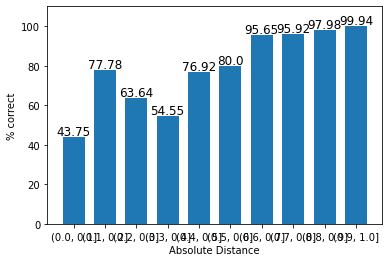

In [34]:
index = []
for i in (correctness1.index):
    index.append(str(i))
plt.bar(index,correctness1["percent"], width=0.7)
for index,data in enumerate(correctness1["percent"]):
    plt.text(x=index , y =data+1 , s=f"{round(data,2)}" , fontdict=dict(fontsize=12),ha='center')
plt.ylim(0,110)
plt.xlabel("Absolute Distance")
plt.ylabel("% correct")

### Confidence

Text(0, 0.5, '% correct')

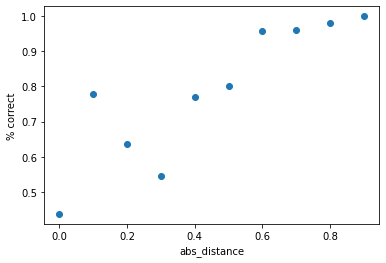

In [40]:
abs1 = table1[["correctness","count"]].groupby(pd.cut(table1["abs_distance"], np.arange(0, 1.1, 0.1))).apply(sum)
abs1["percent"] = (abs1["correctness"]/abs1["count"])
abs1.dropna(inplace=True)
plt.scatter(np.arange(0, 1, 0.1), abs1["percent"])
plt.xlabel("abs_distance")
plt.ylabel("% correct")

In [44]:
# Linear Regression
from sklearn.linear_model import LinearRegression

x_reg1 = np.arange(0, 1, 0.1).reshape((-1, 1))
y_reg1 = abs1["percent"]
reg_model1 = LinearRegression().fit(x_reg1,y_reg1)

In [45]:
print('intercept(alpha):', reg_model1.intercept_)
print('slope(theta):', reg_model1.coef_)

intercept(alpha): 0.5311382789902761
slope(theta): [0.56663807]


# NN2 Odor - Almond (a)

#### Train Set and Test Set

In [46]:
from sklearn.model_selection import train_test_split
X_green = pd.DataFrame()
X_not_green = pd.DataFrame()
y_green = pd.Series(dtype='float64')
y_not_green = pd.Series(dtype='float64')
for i in range(0,len(X)):
    if X.loc[i,"odor"] == "a":
        X_green = X_green.append(X.iloc[i,:])
        y_green = y_green.append(pd.Series(y.iloc[i]))
    else:
        X_not_green = X_not_green.append(X.iloc[i,:])
        y_not_green = y_not_green.append(pd.Series(y.iloc[i]))

In [47]:
# X_test_green, X_train_green, y_test_green, y_train_green = train_test_split(X_green, y_green, test_size=1, random_state=87)
X_train_not_green, X_test_not_green, y_train_not_green, y_test_not_green = train_test_split(X_not_green, y_not_green, test_size=1-(6905/(8124-len(X_green))), random_state=87)

# print(X_test_green)
X_train_green = (X_train_not_green)
X_test_green = X_green.append(X_test_not_green)
y_train_green = (y_train_not_green)
y_test_green = y_green.append(y_test_not_green)

In [48]:
from sklearn.utils import shuffle
X_train_full2 = shuffle(X_train_green, random_state=87)
# X_test2 = shuffle(X_test_green, random_state=87)
y_train_full2 = shuffle(y_train_green, random_state=87)
# y_test2 = shuffle(y_test_green, random_state=87)

#### Validation Set

In [49]:
X_valid2, X_train2 = X_train_full2[:500], X_train_full2[500:]
y_valid2, y_train2 = y_train_full2[:500], y_train_full2[500:]

print("X_train:", X_train2.shape[0], "y_train", y_train2.shape[0])
print("X_valid: ", X_valid2.shape[0], "y_valid ", y_valid2.shape[0])
print("X_test: ", X_test.shape[0], "y_test ", X_test.shape[0])


X_train: 6404 y_train 6404
X_valid:  500 y_valid  500
X_test:  2000 y_test  2000


### Prepare the Data

#### Data Transformation

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

cat_attr_pipeline = Pipeline([
                        ('encoder', OrdinalEncoder())
                    ])

cols = list(X)
pipeline = ColumnTransformer([
                ('cat_attr_pipeline', cat_attr_pipeline, cols)
            ])


X_train2 = pipeline.fit_transform(X_train2)
X_valid2 = pipeline.fit_transform(X_valid2)
X_test2  = pipeline.fit_transform(X_test)
y_test2 = y_test

### Neural Network

#### Model

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense

In [52]:
# tf.random.set_random_seed(87)
tf.random.set_seed(87)

In [53]:
model2 = Sequential([
    InputLayer(input_shape=(22,)),    # input  layer
    Dense(45, activation='relu'),     # hidden layer
    Dense(1,   activation='sigmoid')  # output layer
])

In [54]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 45)                1035      
                                                                 
 dense_3 (Dense)             (None, 1)                 46        
                                                                 
Total params: 1,081
Trainable params: 1,081
Non-trainable params: 0
_________________________________________________________________


#### Compile the Model

In [55]:
model2.compile(loss='binary_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

#### Prepare Callbacks

In [56]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint_cb = ModelCheckpoint('../SavedModels/best_model.h5',
                                save_best_only=True)

early_stopping_cb = EarlyStopping(patience=3,
                                  restore_best_weights=True)

### Training

In [57]:
train_model2 = model2.fit(X_train2, y_train2,
                        epochs=100,
                        validation_data=(X_valid2, y_valid2),
                        callbacks=[checkpoint_cb, early_stopping_cb])
                        


Epoch 1/100
201/201 [==============================] - 1s 2ms/step - loss: 0.4270 - accuracy: 0.8435 - val_loss: 0.3198 - val_accuracy: 0.8980
Epoch 2/100
201/201 [==============================] - 0s 1ms/step - loss: 0.2810 - accuracy: 0.9066 - val_loss: 0.2625 - val_accuracy: 0.9180
Epoch 3/100
201/201 [==============================] - 0s 1ms/step - loss: 0.2378 - accuracy: 0.9166 - val_loss: 0.2565 - val_accuracy: 0.8920
Epoch 4/100
201/201 [==============================] - 0s 1ms/step - loss: 0.2119 - accuracy: 0.9232 - val_loss: 0.2221 - val_accuracy: 0.9280
Epoch 5/100
201/201 [==============================] - 0s 1ms/step - loss: 0.1937 - accuracy: 0.9269 - val_loss: 0.2283 - val_accuracy: 0.9020
Epoch 6/100
201/201 [==============================] - 0s 1ms/step - loss: 0.1809 - accuracy: 0.9288 - val_loss: 0.2644 - val_accuracy: 0.9120
Epoch 7/100
201/201 [==============================] - 0s 1ms/step - loss: 0.1688 - accuracy: 0.9322 - val_loss: 0.2008 - val_accuracy: 0.9380

### Evaluate the Best Model on Test Set

In [58]:
results2 = model2.evaluate(X_test2, y_test2)
print("test loss, test acc:", results2)

63/63 [==============================] - 0s 840us/step - loss: 0.0788 - accuracy: 0.9665
test loss, test acc: [0.07879919558763504, 0.9664999842643738]


### Make Some Predictions

In [59]:
X_new2 = X_test2[1100:1110]
y_prob2 = model2.predict(X_new2)
# print(y_prob2.round(3))

In [60]:
y_pred2 = (model2.predict(X_new2) > 0.5).astype("int32")
# print(y_pred2)
y_test_pred2 = (model2.predict(X_test2) > 0.5).astype("int32")

## KL Divergence

In [61]:
# X_new = X_test[:5]
X_df2 = pd.DataFrame(model2.predict(X_test2))
y_test_pred2 = pd.DataFrame(y_test_pred2).reset_index(drop=True)
X_df2 = pd.concat([X_df2, y_test_pred2], axis=1)
y_test2 = y_test2.reset_index(drop=True)
X_df2 = pd.concat([X_df2, y_test2], axis=1)
X_df2.columns = ["X_pred","y_pred","y_actual"]
print(X_df2)

        X_pred  y_pred  y_actual
0     0.000563       0         0
1     0.001067       0         0
2     0.017092       0         0
3     0.000098       0         0
4     0.989279       1         1
...        ...     ...       ...
1995  0.512429       1         1
1996  0.138356       0         0
1997  0.950168       1         1
1998  0.544643       1         0
1999  0.999727       1         1

[2000 rows x 3 columns]


In [62]:
import math
table2 = pd.DataFrame(columns=["KL_div","abs_distance","y_pred","correctness"])
for i in range(0,len(X_df2)):
    # KL divergence
    p = X_df2.loc[i,"X_pred"]
    kl = -(p*math.log(p) + (1-p)*math.log(1-p))
    table2.loc[i,"KL_div"] = kl
    # absolute distance
    abs_dist = 2*abs(0.5-p)
    table2.loc[i,"abs_distance"] = abs_dist
    # correctness
    y_pred = X_df2.loc[i,"y_pred"]
    y_act = X_df2.loc[i,"y_actual"]
    if y_pred == y_act:
        table2.loc[i,"correctness"] = 1 # correct prediction
    else:
        table2.loc[i,"correctness"] = 0 # wrong prediction
    table2.loc[i,"y_pred"] = y_pred

print(table2)

        KL_div abs_distance y_pred correctness
0     0.004772     0.998875      0           1
1     0.008369     0.997866      0           1
2     0.086494     0.965816      0           1
3     0.001004     0.999804      0           1
4     0.059289     0.978558      1           1
...        ...          ...    ...         ...
1995  0.692838     0.024858      1           1
1996  0.401968     0.723288      0           1
1997   0.19802     0.900336      1           1
1998  0.689156     0.089287      1           0
1999  0.002515     0.999454      1           1

[2000 rows x 4 columns]


In [63]:
table2["count"] = 1
correctness2 = table2[["correctness","count"]].groupby(pd.cut(table2["abs_distance"], np.arange(0, 1.1, 0.1))).apply(sum)
correctness2["percent"] = 100*(correctness2["correctness"]/correctness2["count"])
print(correctness2)

              correctness  count     percent
abs_distance                                
(0.0, 0.1]              6     15   40.000000
(0.1, 0.2]             10     28   35.714286
(0.2, 0.3]             20     25   80.000000
(0.3, 0.4]              6     16   37.500000
(0.4, 0.5]             18     24   75.000000
(0.5, 0.6]             28     35   80.000000
(0.6, 0.7]             50     54   92.592593
(0.7, 0.8]             79     85   92.941176
(0.8, 0.9]            147    149   98.657718
(0.9, 1.0]           1569   1569  100.000000


Text(0, 0.5, '% correct')

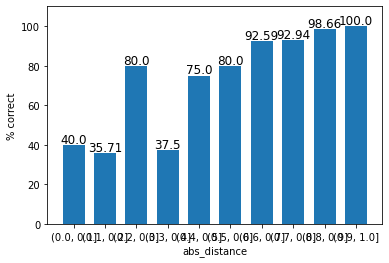

In [64]:
index = []
for i in (correctness2.index):
    index.append(str(i))
plt.bar(index,correctness2["percent"], width=0.7)
for index,data in enumerate(correctness2["percent"]):
    plt.text(x=index , y =data+1 , s=f"{round(data,2)}" , fontdict=dict(fontsize=12),ha='center')
plt.ylim(0,110)
plt.xlabel("abs_distance")
plt.ylabel("% correct")

### Confidence

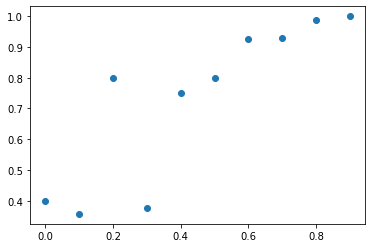

In [65]:
abs2 = table2[["correctness","count"]].groupby(pd.cut(table2["abs_distance"], np.arange(0, 1.1, 0.1))).apply(sum)
abs2["percent"] = (abs2["correctness"]/abs2["count"])
abs2.dropna(inplace=True)
plt.scatter(np.arange(0, 1, 0.1), abs2["percent"])
# print(kl)
# print(np.arange(0, 0.7, 0.05))

In [66]:
# Linear Regression
from sklearn.linear_model import LinearRegression

x_reg2 = np.arange(0, 1, 0.1).reshape((-1, 1))
y_reg2 = abs2["percent"]
reg_model2 = LinearRegression().fit(x_reg2,y_reg2)

In [67]:
print('intercept(alpha):', reg_model2.intercept_)
print('slope(theta):', reg_model2.coef_)

intercept(alpha): 0.40088185826835626
slope(theta): [0.73671981]


## Algorithm C: It = argmax(Ct,i)

In [68]:
# Correct answer
ans = pd.DataFrame(X_df2["y_actual"])

# NN1
alpha1 = reg_model1.intercept_
theta1 = reg_model1.coef_

# NN2
alpha2 = reg_model2.intercept_
theta2 = reg_model2.coef_

In [75]:
abs_dist_table1 = table1[["correctness","count"]].groupby(pd.cut(table1["abs_distance"], np.arange(0, 1, 0.05))).apply(sum)
abs_dist_table1["percent"] = (abs_dist_table1["correctness"]/abs_dist_table1["count"])

abs_dist_table2 = table2[["correctness","count"]].groupby(pd.cut(table2["abs_distance"], np.arange(0, 1, 0.05))).apply(sum)
abs_dist_table2["percent"] = (abs_dist_table2["correctness"]/abs_dist_table2["count"])
print(abs_dist_table2)

              correctness  count   percent
abs_distance                              
(0.0, 0.05]             2      4  0.500000
(0.05, 0.1]             4     11  0.363636
(0.1, 0.15]             4     18  0.222222
(0.15, 0.2]             6     10  0.600000
(0.2, 0.25]             9     13  0.692308
(0.25, 0.3]            11     12  0.916667
(0.3, 0.35]             2      7  0.285714
(0.35, 0.4]             4      9  0.444444
(0.4, 0.45]            12     15  0.800000
(0.45, 0.5]             6      9  0.666667
(0.5, 0.55]            11     15  0.733333
(0.55, 0.6]            17     20  0.850000
(0.6, 0.65]            27     29  0.931034
(0.65, 0.7]            23     25  0.920000
(0.7, 0.75]            33     36  0.916667
(0.75, 0.8]            46     49  0.938776
(0.8, 0.85]            54     55  0.981818
(0.85, 0.9]            93     94  0.989362
(0.9, 0.95]           162    162  1.000000


In [83]:
# Creating NN tables
nn1 = table1.drop(["KL_div","correctness"], axis=1)
nn1["conf"] = alpha1 + theta1 * nn1["abs_distance"]

# for i in range(0,len(nn1)):
#     nn1.loc[i,"conf"] = abs_dist_table1.loc[nn1.loc[i,"KL_div"],"percent"]

nn2 = table2.drop(["KL_div","correctness"], axis=1)
nn2["conf"] = alpha2 + theta2 * nn2["abs_distance"]

# for i in range(0,len(nn2)):
#     nn2.loc[i,"conf"] = abs_dist_table2.loc[nn2.loc[i,"KL_div"],"percent"]
nn1

,abs_distance,y_pred,count,conf
0,0.998517,0.0,1,1.096936
1,0.99607,0.0,1,1.09555
2,0.964708,0.0,1,1.077779
3,0.999776,0.0,1,1.097649
4,0.987287,1.0,1,1.090573
...,...,...,...,...
1995,0.400008,1.0,1,0.757798
1996,0.991911,0.0,1,1.093193
1997,0.928896,1.0,1,1.057486
1998,0.981274,0.0,1,1.087165


In [84]:
# Determing higher confidence NN and choosing that arm

for i in range(0,len(nn1)):
    if nn1.loc[i,"conf"] > nn2.loc[i,"conf"]:
        ans.loc[i,"y_pred"] = nn1.loc[i,"y_pred"]
        ans.loc[i,"chosen_NN"] = 1
        ans.loc[i,"chosen_conf"] = nn1.loc[i,"conf"]

        ans.loc[i,"not_NN"] = 2
        ans.loc[i,"not_conf"] = nn2.loc[i,"conf"]
    else:
        ans.loc[i,"y_pred"] = nn2.loc[i,"y_pred"]
        ans.loc[i,"chosen_NN"] = 2
        ans.loc[i,"chosen_conf"] = nn2.loc[i,"conf"]

        ans.loc[i,"not_NN"] = 1
        ans.loc[i,"not_conf"] = nn1.loc[i,"conf"]

ans

,y_actual,y_pred,chosen_NN,chosen_conf,not_NN,not_conf
0,0,0.0,2.0,1.136773,1.0,1.096936
1,0,0.0,2.0,1.136029,1.0,1.095550
2,0,0.0,2.0,1.112418,1.0,1.077779
3,0,0.0,2.0,1.137457,1.0,1.097649
4,1,1.0,2.0,1.121805,1.0,1.090573
...,...,...,...,...,...,...
1995,1,1.0,1.0,0.757798,2.0,0.419195
1996,0,0.0,1.0,1.093193,2.0,0.933743
1997,1,1.0,2.0,1.064177,1.0,1.057486
1998,0,0.0,1.0,1.087165,2.0,0.466661


#### Comparing performance

In [85]:
wrong_record = ""
# NN1 performance
cost1 = 0
for i in range(0,len(nn1)):
    if nn1.loc[i,"y_pred"] != ans.loc[i,"y_actual"]:
        # cost1 += 1 * nn1.loc[i,"conf"]
        cost1 += 1
    else:
        pass

# NN2 performance
cost2 = 0
for i in range(0,len(nn2)):
    if nn2.loc[i,"y_pred"] != ans.loc[i,"y_actual"]:
        # cost2 += 1 * nn2.loc[i,"conf"]
        cost2 += 1
    else:
        pass

# Combined performance
cost3 = 0
for i in range(0,len(nn1)):
    chosen_nn = int(ans.loc[i,"chosen_NN"])
    chosen_nn_conf = round(ans.loc[i,"chosen_conf"],3)
    not_nn = int(ans.loc[i,"not_NN"])
    not_nn_conf = round(ans.loc[i,"not_conf"],3)
    if ans.loc[i,"y_pred"] != ans.loc[i,"y_actual"]:
        cost3 += 1
        # cost3 += 1 * ans.loc[i,"chosen_conf"]
        wrong_record = wrong_record + (f"{i}: Wrong NN:{chosen_nn}, Conf:{chosen_nn_conf} - Other NN{not_nn}, Conf:{not_nn_conf} ") + "\n"
    else:
        pass

In [86]:
print(wrong_record)
print(f"Error count for NN1:{cost1}, NN2:{cost2}, Combined:{cost3}")


119: Wrong NN:2, Conf:0.659 - Other NN1, Conf:0.633 
234: Wrong NN:2, Conf:0.874 - Other NN1, Conf:0.551 
271: Wrong NN:1, Conf:0.788 - Other NN2, Conf:0.44 
292: Wrong NN:1, Conf:0.716 - Other NN2, Conf:0.503 
471: Wrong NN:2, Conf:0.73 - Other NN1, Conf:0.552 
633: Wrong NN:2, Conf:0.555 - Other NN1, Conf:0.531 
669: Wrong NN:2, Conf:0.876 - Other NN1, Conf:0.79 
815: Wrong NN:1, Conf:0.646 - Other NN2, Conf:0.523 
842: Wrong NN:1, Conf:0.579 - Other NN2, Conf:0.472 
931: Wrong NN:2, Conf:0.783 - Other NN1, Conf:0.585 
990: Wrong NN:2, Conf:1.047 - Other NN1, Conf:0.911 
1275: Wrong NN:1, Conf:0.867 - Other NN2, Conf:0.781 
1395: Wrong NN:1, Conf:0.672 - Other NN2, Conf:0.524 
1460: Wrong NN:1, Conf:0.793 - Other NN2, Conf:0.757 
1595: Wrong NN:2, Conf:0.667 - Other NN1, Conf:0.661 
1683: Wrong NN:1, Conf:0.997 - Other NN2, Conf:0.886 
1735: Wrong NN:1, Conf:0.686 - Other NN2, Conf:0.433 
1821: Wrong NN:1, Conf:1.042 - Other NN2, Conf:0.973 
1834: Wrong NN:1, Conf:0.867 - Other NN2, 